In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [15]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [16]:
cols = ["FIPS", "E_TOTPOP", "E_POV150"]

In [17]:
df = helper_400.get_svi_df(cols)

In [18]:
df["E_OVERPOV150"] = df["E_TOTPOP"] - df["E_POV150"]

In [19]:
df.head()

,FIPS,E_TOTPOP,E_POV150,E_OVERPOV150
0,6001400100,3035,205,2830
1,6001400200,1983,138,1845
2,6001400300,5058,430,4628
3,6001400400,4179,498,3681
4,6001400500,4021,513,3508


# Exposure per FIPS over time

In [20]:
exposure = helper_400.get_exposure_df()

In [21]:
df = df.merge(exposure, left_on="FIPS", right_on="GEOID")

In [22]:
hotspots = helper_400.hotspots

In [23]:
demographic_cols = ["E_POV150", "E_OVERPOV150"]

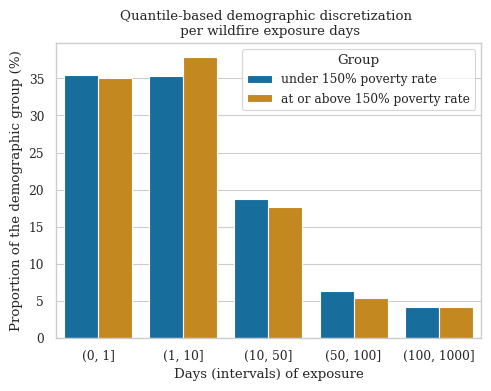

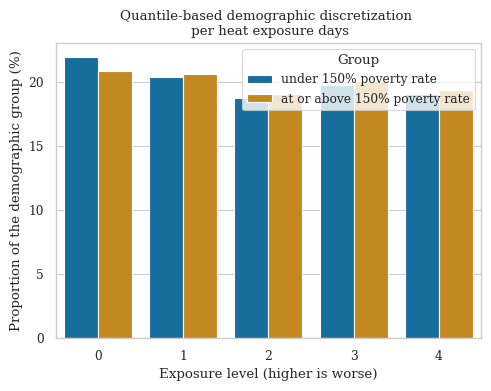

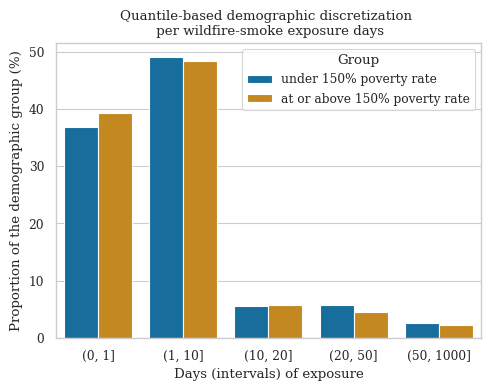

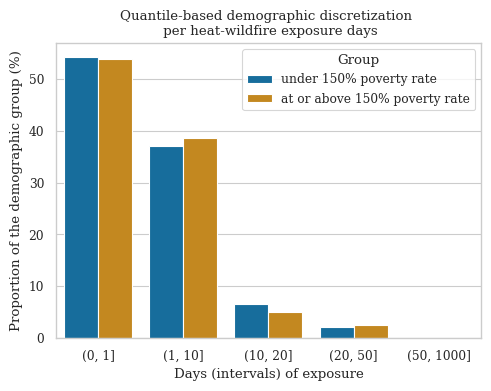

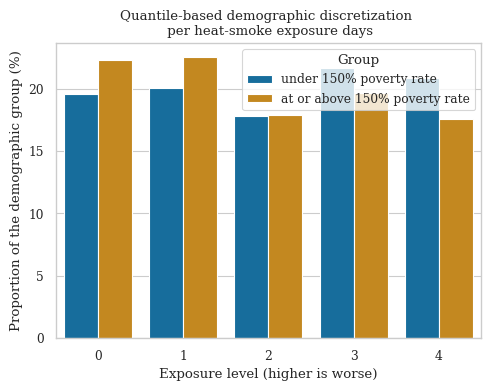

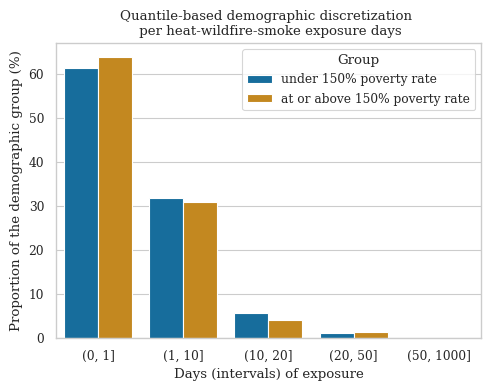

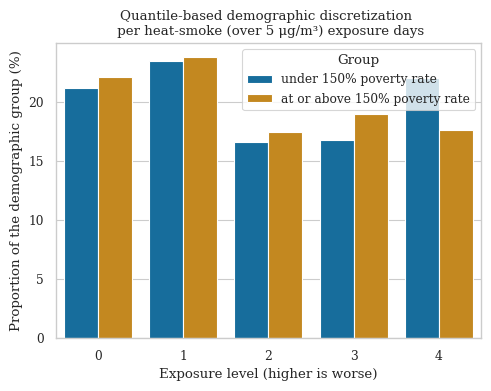

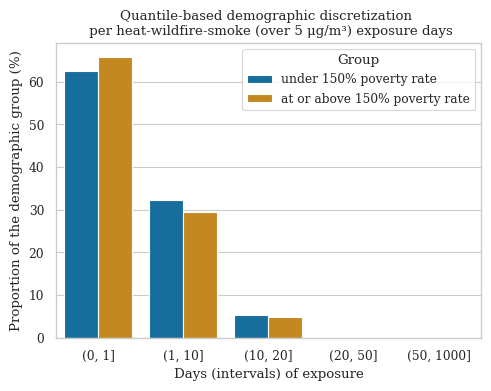

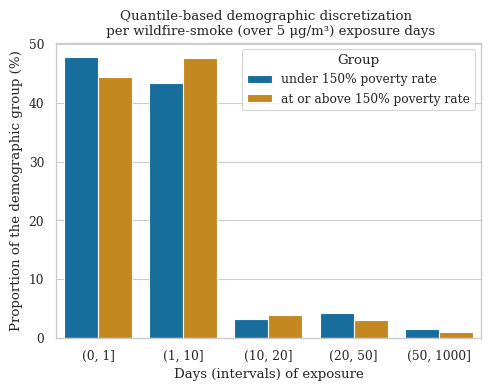

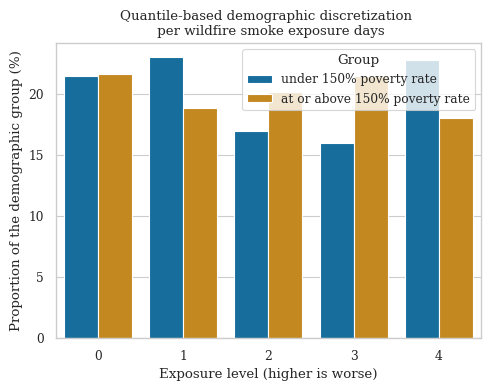

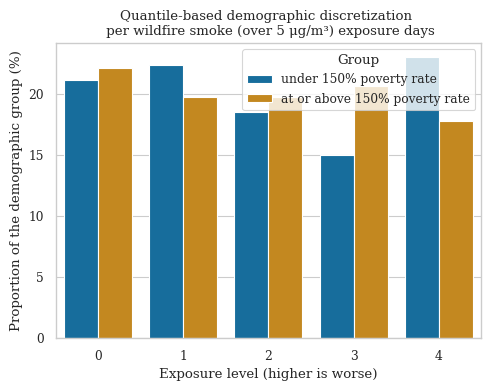

In [25]:
for hspt in hotspots.keys():
    df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])

    exposure_per_category = df.groupby("exposure_category")[demographic_cols].sum()

    for dc in demographic_cols:
        exposure_per_category[dc + "_normalized"] = (
            exposure_per_category[dc] * 100 / exposure_per_category[dc].sum()
        )

    exposure_per_category = exposure_per_category.drop(columns=demographic_cols)

    exposure_per_category = exposure_per_category[
        [
            "E_POV150_normalized",
            "E_OVERPOV150_normalized",
        ]
    ]

    exposure_per_category = exposure_per_category.rename(
        columns={
            "E_POV150_normalized": "under 150% poverty rate",
            "E_OVERPOV150_normalized": "at or above 150% poverty rate",
        }
    )
    helper_400.plot_qbar(exposure_per_category, hspt, figname="income", legloc="best")